Introduction to Tensors

https://www.tensorflow.org/guide/tensor

Introduction to Variables

https://www.tensorflow.org/guide/variable

Introduction to gradients and automatic differentiation


https://www.tensorflow.org/guide/autodiff

In [160]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers, losses
from tensorflow.keras import callbacks
from tensorflow.keras.models import load_model
from pandas import DataFrame as df
from scipy.stats import norm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import random
from matplotlib.ticker import MultipleLocator

In [162]:
pwd

'C:\\Users\\deepp\\Google Drive\\MSDS\\MATH 6373 Deep Learning\\HW1'

In [163]:
ls

 Volume in drive C is Acer
 Volume Serial Number is B026-7F05

 Directory of C:\Users\deepp\Google Drive\MSDS\MATH 6373 Deep Learning\HW1

02/25/2021  11:38 PM    <DIR>          .
02/25/2021  11:38 PM    <DIR>          ..
02/25/2021  11:03 PM            79,005 AMZN.xlsx
02/25/2021  11:03 PM            75,874 BABA.xlsx
02/26/2021  12:08 AM    <DIR>          bestModel
02/25/2021  11:03 PM            70,650 DJIA.xlsx
02/25/2021  11:03 PM           140,978 HW1_Hora_Patel_Neopaney_Data_V2.csv
02/25/2021  11:03 PM            76,420 SHOP.xlsx
               5 File(s)        442,927 bytes
               3 Dir(s)  66,232,885,248 bytes free


In [164]:
import os
os.chdir('C:\\Users\\deepp\\Google Drive\\MSDS\\MATH 6373 Deep Learning\\HW1')

In [165]:
# Reading the excel files from the datasets
ticker1 = pd.read_excel('AMZN.xlsx')
ticker2 = pd.read_excel('BABA.xlsx')
ticker3 = pd.read_excel('SHOP.xlsx')
ticker4 = pd.read_excel('DJIA.xlsx')

In [166]:
# Removing unecessary columns
ticker1 = ticker1[['Date', ' Close']]
ticker2 = ticker2[['Date', ' Close']]
ticker3 = ticker3[['Date', ' Close']]
ticker4 = ticker4[['Date', ' Close']]

# Making unique column names for 'Close'
ticker1.columns = ['Date', 'Close_1']
ticker2.columns = ['Date', 'Close_2']
ticker3.columns = ['Date', 'Close_3']
ticker4.columns = ['Date', 'Close_4']

# Mering into one dataframe by 'Date'
gog = pd.merge(ticker1, ticker2, on='Date')
gog = pd.merge(gog, ticker3, on='Date')
gog = pd.merge(gog, ticker4, on='Date')

# Creates the features as lists
ticker1_1 = gog['Close_1'].values.tolist()[1:] + [0]
ticker1_2 = gog['Close_1'].values.tolist()[2:] + [0, 0]
ticker1_3 = gog['Close_1'].values.tolist()[3:] + [0, 0, 0]
ticker1_4 = gog['Close_1'].values.tolist()[4:] + [0, 0, 0, 0]

ticker2_1 = gog['Close_2'].values.tolist()[1:] + [0]
ticker2_2 = gog['Close_2'].values.tolist()[2:] + [0, 0]
ticker2_3 = gog['Close_2'].values.tolist()[3:] + [0, 0, 0]
ticker2_4 = gog['Close_2'].values.tolist()[4:] + [0, 0, 0, 0]

ticker3_1 = gog['Close_3'].values.tolist()[1:] + [0]
ticker3_2 = gog['Close_3'].values.tolist()[2:] + [0, 0]
ticker3_3 = gog['Close_3'].values.tolist()[3:] + [0, 0, 0]
ticker3_4 = gog['Close_3'].values.tolist()[4:] + [0, 0, 0, 0]

ticker4_1 = gog['Close_4'].values.tolist()[1:] + [0]
ticker4_2 = gog['Close_4'].values.tolist()[2:] + [0, 0]
ticker4_3 = gog['Close_4'].values.tolist()[3:] + [0, 0, 0]
ticker4_4 = gog['Close_4'].values.tolist()[4:] + [0, 0, 0, 0]

# initializes the input layer in pandas (will change to numpy later)
# This first column is the true values of ticker1
my_input_layer = gog[['Close_1']]

# Adds each feature to the input layer
my_input_layer.insert(1,  "A", ticker1_1)
my_input_layer.insert(2,  "B", ticker1_2)
my_input_layer.insert(3,  "C", ticker1_3)
my_input_layer.insert(4,  "D", ticker1_4)
my_input_layer.insert(5,  "E", ticker2_1)
my_input_layer.insert(6,  "F", ticker2_2)
my_input_layer.insert(7,  "G", ticker2_3)
my_input_layer.insert(8,  "H", ticker2_4)
my_input_layer.insert(9,  "I", ticker3_1)
my_input_layer.insert(10, "J", ticker3_2)
my_input_layer.insert(11, "K", ticker3_3)
my_input_layer.insert(12, "L", ticker3_4)
my_input_layer.insert(13, "M", ticker4_1)
my_input_layer.insert(14, "N", ticker4_2)
my_input_layer.insert(15, "O", ticker4_3)
my_input_layer.insert(16, "P", ticker4_4)

# Drops the last 4 rows of the dataframe
a1 = len(my_input_layer)
my_input_layer = my_input_layer.drop([(a1-4), (a1-3), (a1-2), (a1-1)], axis=0)

# Cuts the data set down to 1000 cases
my_input_layer = my_input_layer.loc[0:999,:] #1400

# Creates the inputs and outputs which will be used in the tensorflow model.
X = my_input_layer.iloc[:,1:].to_numpy()
Y = my_input_layer.iloc[:,0].to_numpy()

In [167]:
X.shape

(1000, 16)

In [168]:
# Standardizing the input layer.  (output layer does not get standardized)
X_scaled = StandardScaler().fit_transform(X)

# Just checking the values to make sure this worked. 
print(X_scaled)
print(X_scaled.shape,Y.shape)

[[ 1.97960442  2.09643122  2.07449333 ...  2.36949263  2.42317488
   2.39548874]
 [ 2.09104494  2.06853412  2.01790677 ...  2.4160609   2.38800731
   2.37038472]
 [ 2.06317414  2.01201366  2.03039602 ...  2.38093625  2.3629377
   2.35957848]
 ...
 [-1.43956925 -1.4328578  -1.43237597 ... -1.71131306 -1.71031085
  -1.66453528]
 [-1.43491701 -1.43423912 -1.42643074 ... -1.71237921 -1.6664517
  -1.78286162]
 [-1.43629703 -1.42830085 -1.43789348 ... -1.66857359 -1.78461585
  -1.77303067]]
(1000, 16) (1000,)


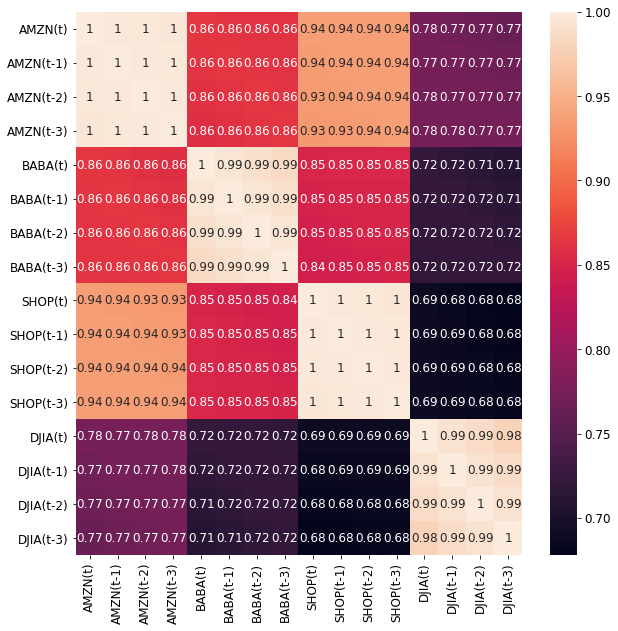

In [169]:
# Doing the PCA part
# np.corrcoef() gives the correlation between the rows, as opposed to R which does the columns.  Therefore, you need to transpose the argument matrix first.
CORR = np.corrcoef(X_scaled.T)
fig, ax = plt.subplots(figsize=(10,10))
xlabs = ['AMZN(t)','AMZN(t-1)','AMZN(t-2)','AMZN(t-3)','BABA(t)','BABA(t-1)','BABA(t-2)','BABA(t-3)','SHOP(t)','SHOP(t-1)','SHOP(t-2)','SHOP(t-3)','DJIA(t)','DJIA(t-1)','DJIA(t-2)','DJIA(t-3)']
ylabs = ['AMZN(t)','AMZN(t-1)','AMZN(t-2)','AMZN(t-3)','BABA(t)','BABA(t-1)','BABA(t-2)','BABA(t-3)','SHOP(t)','SHOP(t-1)','SHOP(t-2)','SHOP(t-3)','DJIA(t)','DJIA(t-1)','DJIA(t-2)','DJIA(t-3)']
sns.heatmap(CORR, annot=True, xticklabels=xlabs, yticklabels=ylabs)

In [170]:
from numpy import linalg as LA
v, w = LA.eig(CORR)

# Confirming outputs
print(w.shape)
print(v.shape)
print(v)

(16, 16)
(16,)
[1.36579172e+01 1.40000594e+00 6.58800226e-01 2.07746154e-01
 2.98851596e-02 1.21981299e-02 9.25764526e-03 8.28681747e-03
 4.94186953e-03 3.33437996e-03 3.96090452e-04 6.84984612e-04
 8.32681755e-04 1.41928392e-03 2.19506490e-03 2.09837287e-03]


<function matplotlib.pyplot.show(*args, **kw)>

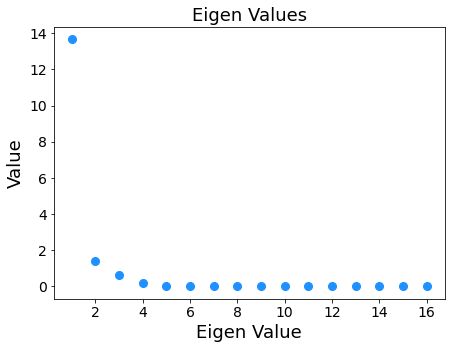

In [171]:
# Showing the eigen values
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(7,5))
plt.plot(range(1,(len(v)+1)), v, 'bo', color='dodgerblue', markersize=8)
plt.xlabel('Eigen Value', fontsize=18)
plt.ylabel('Value', fontsize=18)
plt.title('Eigen Values', fontsize=18)
plt.show

[85.36, 94.11, 98.23, 99.53, 99.71, 99.79, 99.85, 99.9, 99.93, 99.95, 99.95, 99.96, 99.96, 99.97, 99.99, 100.0]
3


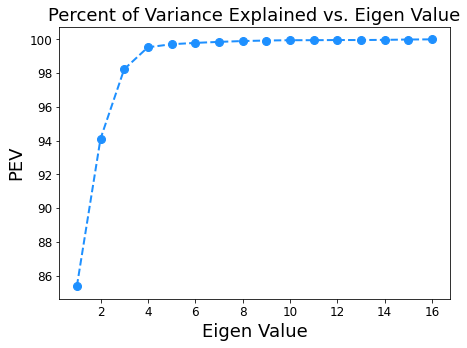

In [172]:
PVE_vector = []
PVE_sum = 0
for i in v:
  PVE_sum += 100*i/sum(v)
  PVE_vector.append(round(PVE_sum, 2))

print(PVE_vector)

#It can be seen that 95% of Variance Explained is achieved with the first two eigen values.  Therefore h_min = 3
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(7,5))
plt.plot(range(1,(len(PVE_vector)+1)), PVE_vector, color='dodgerblue', marker='o', linestyle='dashed', linewidth=2, markersize=8)
plt.xlabel('Eigen Value', fontsize=18)
plt.ylabel('PEV', fontsize=18)
plt.title('Percent of Variance Explained vs. Eigen Value', fontsize=18)
plt.show

x = np.asarray(PVE_vector)
h_min = np.where(x>95)[0][0] + 1
print(h_min)

In [180]:
# Creates the training and testing sets
# In the .docx template Azencott sent us the splitting is done before scaling, but this doesn't make sense to me... seems like it only gives the possibility the test and training sets ending up with different means and variances.
# It just gives the Xtrain and Xtest the opportunity to have different distributions instead of having the same. Same for Ytest, Ytrain
Ytrain,Ytest,Xtrain,Xtest = train_test_split(Y,X_scaled, train_size=0.8, random_state= 0)
print(Xtest.shape, Xtrain.shape, Ytest.shape, Ytrain.shape)

(200, 16) (800, 16) (200,) (800,)


In [181]:
# Determining h_max for a single hidden layer.  h should not be higher than h_max to ensure that the number of parameters needing to be calculated 
# does not exceed the number of input cases.  This is the parcimony principle. 
h_max = int(((Xtrain.shape[0] - 1)/18))

# Determines the suggested h values to test.  I have constructed it such that h increases exponentially from h_min to h_max.
h2 = int(round(h_min*(h_max/h_min)**(1/3)))
h3 = int(round(h_min*(h_max/h_min)**(2/3)))
h_list = [h_min, h2, h3, h_max]
print(h_list)

[3, 7, 18, 44]


In [182]:
# Establishing some variables
p = Xtrain.shape[0] # number of cases
n_feats = Xtrain.shape[1] # number of features
my_h = h_list[1] # size layer L2 aka h.  You can put any value for h or try the suggested values from "h_list"
out = 1 # size final output layer 

# Establishing learning parameters
my_epochs = 250    # 25 is good for h=6.  
patience = 10 # waiting steps with no improvement before stop 
batch = 25
initial = 0.1 # std deviation of each initial random parameter
decay = -0.04 # eps(s) = multiplier of gradient at step s of grad. descent   (in generic descent formula the term - eps(s) GRADMSE_s)  the  eps(s)is given by  = exp( - decay x s) = 0.996s

# Establishing other things
loss_fn = losses.MeanSquaredError() # defines the loss function to use
#loss_fn = losses.CategoricalCrossentropy()  # This loss function is used when doing classification problems

# learning schedule defining the decay rate exp(-04)= 0.96 for gradient and one decay step per batch  
lr_schedule = optimizers.schedules.ExponentialDecay(initial_learning_rate=initial, decay_steps=p/batch, decay_rate=np.exp(decay),staircase=True)

# Establishing the optimizer method...?
optimizer = optimizers.Adam(learning_rate=0.01) # Weiqiang's code
#optimizer=optimizers.SGD(learning_rate=lr_schedule) # Azencott's code

In [183]:
# Creating the MLP model
model = Sequential()

# Adding input layer
model.add(keras.layers.Input(n_feats, name='L1'))  

# Adding the hidden layer
model.add(Dense(my_h, activation='relu', kernel_initializer='RandomNormal', bias_initializer='RandomNormal', input_shape=(n_feats,), name='Hidden'))

# Adding the output layer
model.add(Dense(1, activation='relu', kernel_initializer='RandomNormal', bias_initializer='RandomNormal', name='L2'))

# I'm not sure if softmax is only used for classification problems or what....

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden (Dense)               (None, 7)                 119       
_________________________________________________________________
L2 (Dense)                   (None, 1)                 8         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [184]:
# Set the randomizer
random.seed(a=0)

# Compiling the model...?
model.compile(optimizer=optimizer, loss=loss_fn)  # Weiqiang's code
#model.compile(optimizer=optimizer, loss=loss_fn, metrics = ['accuracy'])  # Azencott's code

In [185]:
from tensorflow.keras.utils import plot_model
plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [179]:
model.layers[0].get_weights()
print(model.layers[0].get_weights()[0].shape)
print(model.layers[0].get_weights()[1].shape)
print(model.layers[0].get_weights()[1])

(16, 7)
(7,)
[ 0.02716818 -0.01244566  0.11749636 -0.00168086 -0.05223901  0.05069619
 -0.00401915]


# Prepare the training dataset

In [186]:
train_dataset = tf.data.Dataset.from_tensor_slices((Xtrain, Ytrain))
train_dataset.element_spec

train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch)
train_dataset.element_spec

(TensorSpec(shape=(None, 16), dtype=tf.float64, name=None),
 TensorSpec(shape=(None,), dtype=tf.float64, name=None))

# train the model “manually”

In [187]:
batch_loss = []
gradsNorm = [] # I think this is Test Grad(MSE)
epoch_loss = []
val_loss = [] # aka Test MSE
best_val_loss = model.evaluate(Xtest,Ytest,verbose=0)
print(best_val_loss)

3533874.25


In [189]:
# Creating a placeholder for the best model
model.save('bestModel')

# Doing the automatic learning

for epoch in range(my_epochs):
  print("\nStart of epoch %d" % (epoch,))
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
    with tf.GradientTape() as tape:
      y_batch_pred = model(x_batch_train, training=True)
      loss_value = loss_fn(y_batch_train,y_batch_pred)
    grads = tape.gradient(loss_value, model.trainable_weights)
    gradsNorm.append(   np.sqrt( sum( [ np.sum( np.square(g.numpy()))  for g in grads ])))
    batch_loss.append(loss_value.numpy())
    optimizer.apply_gradients( zip( grads,model.trainable_weights))
  epoch_loss_value = model.evaluate(Xtrain,Ytrain,verbose=0)
  epoch_loss.append(epoch_loss_value)

  val_loss_value = model.evaluate(Xtest,Ytest,verbose=0)
  val_loss.append(val_loss_value)
  print("epoch_loss: %.4f - val_loss:%.4f" %  (float(epoch_loss_value), float(val_loss_value)))

  if val_loss_value < best_val_loss:
    best_val_loss=val_loss_value
    model.save('bestModel')

INFO:tensorflow:Assets written to: bestModel\assets

Start of epoch 0
epoch_loss: 12933.8408 - val_loss:12510.6377
INFO:tensorflow:Assets written to: bestModel\assets

Start of epoch 1
epoch_loss: 12429.9736 - val_loss:13183.1641

Start of epoch 2
epoch_loss: 12105.6533 - val_loss:12330.6113
INFO:tensorflow:Assets written to: bestModel\assets

Start of epoch 3
epoch_loss: 11942.3467 - val_loss:12275.7109
INFO:tensorflow:Assets written to: bestModel\assets

Start of epoch 4
epoch_loss: 11778.3135 - val_loss:12094.2305
INFO:tensorflow:Assets written to: bestModel\assets

Start of epoch 5
epoch_loss: 11632.0039 - val_loss:11945.3125
INFO:tensorflow:Assets written to: bestModel\assets

Start of epoch 6
epoch_loss: 11500.7715 - val_loss:11569.4248
INFO:tensorflow:Assets written to: bestModel\assets

Start of epoch 7
epoch_loss: 11415.6865 - val_loss:11880.8936

Start of epoch 8
epoch_loss: 11214.7002 - val_loss:11482.1963
INFO:tensorflow:Assets written to: bestModel\assets

Start of epoch 9

INFO:tensorflow:Assets written to: bestModel\assets

Start of epoch 80
epoch_loss: 2152.0046 - val_loss:1417.6150

Start of epoch 81
epoch_loss: 2124.9502 - val_loss:1387.2426
INFO:tensorflow:Assets written to: bestModel\assets

Start of epoch 82
epoch_loss: 2124.0254 - val_loss:1392.2321

Start of epoch 83
epoch_loss: 2102.1917 - val_loss:1380.0212
INFO:tensorflow:Assets written to: bestModel\assets

Start of epoch 84
epoch_loss: 2344.8093 - val_loss:1568.7271

Start of epoch 85
epoch_loss: 2167.2356 - val_loss:1413.0586

Start of epoch 86
epoch_loss: 2083.8616 - val_loss:1375.1774
INFO:tensorflow:Assets written to: bestModel\assets

Start of epoch 87
epoch_loss: 2176.7664 - val_loss:1432.6747

Start of epoch 88
epoch_loss: 2163.8318 - val_loss:1422.1675

Start of epoch 89
epoch_loss: 2083.6997 - val_loss:1358.1836
INFO:tensorflow:Assets written to: bestModel\assets

Start of epoch 90
epoch_loss: 2092.9595 - val_loss:1349.3024
INFO:tensorflow:Assets written to: bestModel\assets

Start

epoch_loss: 1935.8679 - val_loss:1355.5024

Start of epoch 198
epoch_loss: 1849.4446 - val_loss:1278.2675

Start of epoch 199
epoch_loss: 1994.7128 - val_loss:1399.6581

Start of epoch 200
epoch_loss: 1802.5806 - val_loss:1251.4869

Start of epoch 201
epoch_loss: 1832.0173 - val_loss:1265.9937

Start of epoch 202
epoch_loss: 1801.7859 - val_loss:1215.6603
INFO:tensorflow:Assets written to: bestModel\assets

Start of epoch 203
epoch_loss: 1802.8555 - val_loss:1235.4530

Start of epoch 204
epoch_loss: 1789.5764 - val_loss:1205.4304
INFO:tensorflow:Assets written to: bestModel\assets

Start of epoch 205
epoch_loss: 1823.5214 - val_loss:1250.7178

Start of epoch 206
epoch_loss: 1855.1947 - val_loss:1271.6793

Start of epoch 207
epoch_loss: 1812.9778 - val_loss:1215.9188

Start of epoch 208
epoch_loss: 1938.8988 - val_loss:1341.2183

Start of epoch 209
epoch_loss: 2070.8635 - val_loss:1472.9055

Start of epoch 210
epoch_loss: 1786.5444 - val_loss:1212.2404

Start of epoch 211
epoch_loss: 18

In [190]:
np.array(val_loss)

array([3.51461000e+06, 3.43448375e+06, 3.28119800e+06, 3.06209300e+06,
       2.79282100e+06, 2.49951925e+06, 2.20237350e+06, 1.93801675e+06,
       1.70995888e+06, 1.52920575e+06, 1.39668450e+06, 1.30058500e+06,
       1.23185775e+06, 1.17882612e+06, 1.13593288e+06, 1.09698525e+06,
       1.06131562e+06, 1.02633938e+06, 9.92743938e+05, 9.60307938e+05,
       9.26378000e+05, 8.94324812e+05, 8.59390000e+05, 8.26755125e+05,
       7.93425062e+05, 7.59680250e+05, 7.27584938e+05, 6.93608000e+05,
       6.60303062e+05, 6.26868312e+05, 5.92518000e+05, 5.60024250e+05,
       5.27358125e+05, 4.96375844e+05, 4.65586312e+05, 4.38663188e+05,
       4.12028594e+05, 3.87913375e+05, 3.66003906e+05, 3.44871375e+05,
       3.26793969e+05, 3.10618188e+05, 2.95479469e+05, 2.82694531e+05,
       2.70350719e+05, 2.59331422e+05, 2.48756516e+05, 2.39496984e+05,
       2.30689188e+05, 2.22237562e+05, 2.14096688e+05, 2.06434562e+05,
       1.98512141e+05, 1.91941406e+05, 1.84678578e+05, 1.78168859e+05,
      

In [191]:
bestModel = tf.keras.models.load_model('bestModel')

In [192]:
model.evaluate(Xtest,Ytest)

7/7 [==============================] - 0s 836us/step - loss: 1207.5417


1207.541748046875

In [193]:
bestModel.evaluate(Xtest,Ytest)

7/7 [==============================] - 0s 3ms/step - loss: 1193.8226


1193.8226318359375

#access hidden layer activity 

use `bestModel.layers[0]` as a function.

In [194]:
bestModel.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden (Dense)               (None, 7)                 119       
_________________________________________________________________
L2 (Dense)                   (None, 1)                 8         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [195]:
bestModel.layers[0]#([])

In [196]:
bestModel.layers[0](X).numpy()[0]

array([ 53191.4  ,      0.   ,      0.   , 361759.66 ,  44929.598,
            0.   , 315894.8  ], dtype=float32)

In [197]:
print(Xtrain.shape)
print(len(batch_loss))
print(len(gradsNorm))
print(len(epoch_loss))
print(len(val_loss))

(800, 16)
12416
12416
388
388


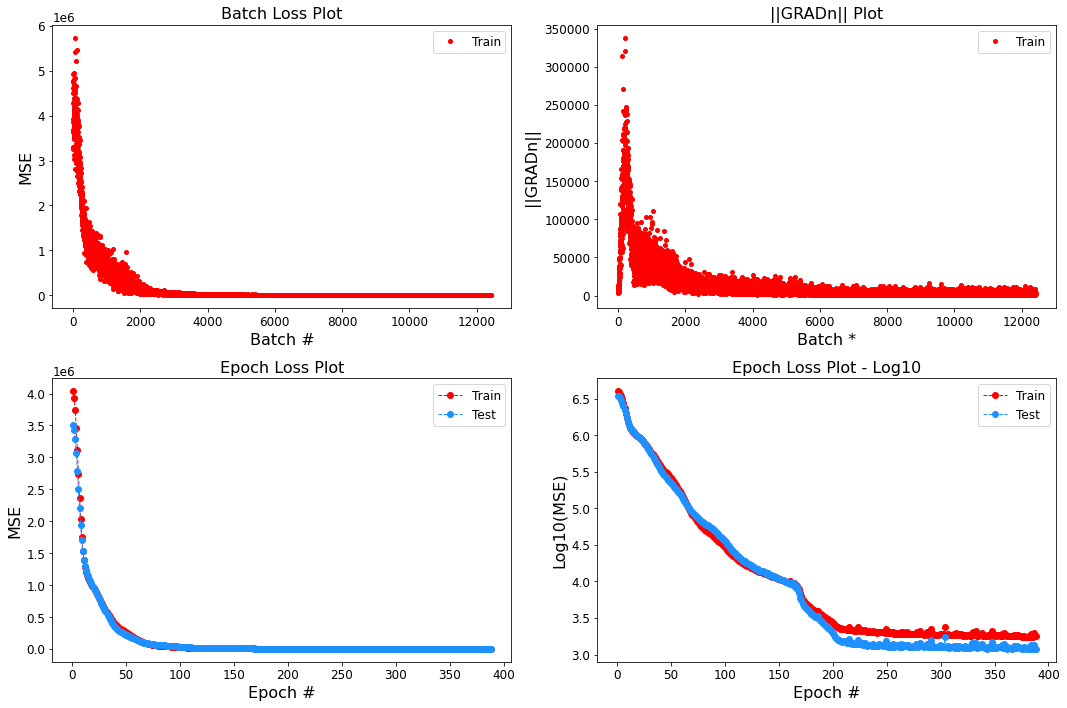

In [198]:
fig = plt.figure(figsize= (15,10))
ax1 = fig.add_subplot(2,2,1)
# Traing MSE batch to batch
plt.plot(range(1,(len(batch_loss)+1)), batch_loss, 'ro', markersize=4)
plt.xlabel('Batch #', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.title('Batch Loss Plot', fontsize=16)
plt.legend(['Train'])

ax2 = fig.add_subplot(2,2,2)
# Normalized Graident of (Train MSE) aka norGrad^n
plt.plot(range(1,(len(gradsNorm)+1)), gradsNorm, 'ro', markersize=4)
plt.xlabel('Batch *', fontsize=16)
plt.ylabel('||GRADn||', fontsize=16)
plt.title('||GRADn|| Plot', fontsize=16)
plt.legend(['Train'])

ax3 = fig.add_subplot(2,2,3)
# Train MSE plot
plt.plot(range(1,(len(epoch_loss)+1)), epoch_loss, color='red', marker='o', linestyle='dashed', linewidth=1, markersize=6) # Train MSE
plt.plot(range(1,(len(val_loss)+1)), val_loss, color='dodgerblue', marker='o', linestyle='dashed', linewidth=1, markersize=6) # Test MSE
plt.xlabel('Epoch #', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.legend(['Train', 'Test'])
plt.title('Epoch Loss Plot', fontsize=16)

ax4 = fig.add_subplot(2,2,4)
# Train MSE plot (log)
plt.plot(range(1,(len(epoch_loss)+1)), np.log10(epoch_loss), color='red', marker='o', linestyle='dashed', linewidth=1, markersize=6)
plt.plot(range(1,(len(val_loss)+1)), np.log10(val_loss), color='dodgerblue', marker='o', linestyle='dashed', linewidth=1, markersize=6)
plt.xlabel('Epoch #', fontsize=16)
plt.ylabel('Log10(MSE)', fontsize=16)
plt.title('Epoch Loss Plot - Log10', fontsize=16)
plt.legend(['Train', 'Test'])
plt.tight_layout()

In [ ]:
# # Traing MSE batch to batch
# plt.plot(range(1,(len(batch_loss)+1)), batch_loss, 'ro', markersize=4)
# plt.xlabel('batch #')
# plt.ylabel('MSE')
# plt.title('batch loss Plot')
# plt.show

In [ ]:
# # Normalized Graident of (Train MSE) aka norGrad^n
# plt.plot(range(1,(len(gradsNorm)+1)), gradsNorm, 'ro', markersize=4)
# plt.xlabel('n')
# plt.ylabel('||GRADn||')
# plt.title('||GRADn|| Plot')
# plt.show

In [ ]:
# # Train MSE plot
# plt.plot(range(1,(len(epoch_loss)+1)), epoch_loss, color='red', marker='o', linestyle='dashed', linewidth=1, markersize=6)
# plt.xlabel('n')
# plt.ylabel('MSE')
# plt.title('Epoch Loss Plot')
# plt.show

In [ ]:
# # Train MSE plot
# plt.plot(range(1,(len(epoch_loss)+1)), np.log10(epoch_loss), color='red', marker='o', linestyle='dashed', linewidth=1, markersize=6)
# plt.xlabel('n')
# plt.ylabel('Log10(MSE)')
# plt.title('Epoch Loss Plot')
# plt.show

<function matplotlib.pyplot.show(*args, **kw)>

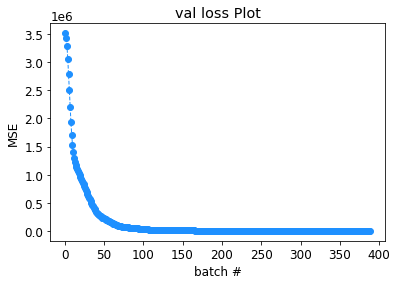

In [199]:
# Test MSE plot
plt.plot(range(1,(len(val_loss)+1)), val_loss, color='dodgerblue', marker='o', linestyle='dashed', linewidth=1, markersize=6)
plt.xlabel('batch #')
plt.ylabel('MSE')
plt.title('val loss Plot')
plt.show

# Alternatively...
#plt.plot(range(1,(len(val_loss)+1)), np.log(val_loss), 'ro')
#plt.show

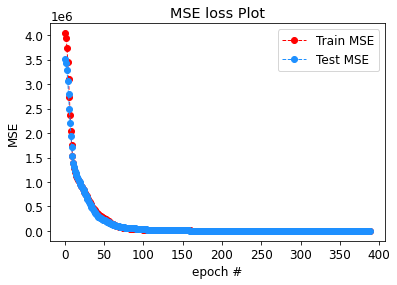

In [200]:
# Train & Test MSE plot
# fig = plt.figure(figsize= (20,4))
plt.plot(range(1,(len(epoch_loss)+1)), epoch_loss, color='red', marker='o', linestyle='dashed', linewidth=1, markersize=6) # Train MSE
plt.plot(range(1,(len(val_loss)+1)), val_loss, color='dodgerblue', marker='o', linestyle='dashed', linewidth=1, markersize=6) # Test MSE
plt.xlabel('epoch #')
plt.ylabel('MSE')
plt.title('MSE loss Plot')
plt.legend(['Train MSE', 'Test MSE'])
plt.show;

In [201]:
# Puting the neuron states/activites into a numpy array.
neuron_states = np.empty((0,my_h))
for i in range(X.shape[0]):
  neuron_states = np.vstack((neuron_states, bestModel.layers[0](X).numpy()[i]))
print(neuron_states.shape)
  

(1000, 7)


Neuron Average States:
   Neuron 1: 23895
   Neuron 2: 0
   Neuron 3: 0
   Neuron 4: 304132
   Neuron 5: 17380
   Neuron 6: 0
   Neuron 7: 267258



<Figure size 432x288 with 0 Axes>

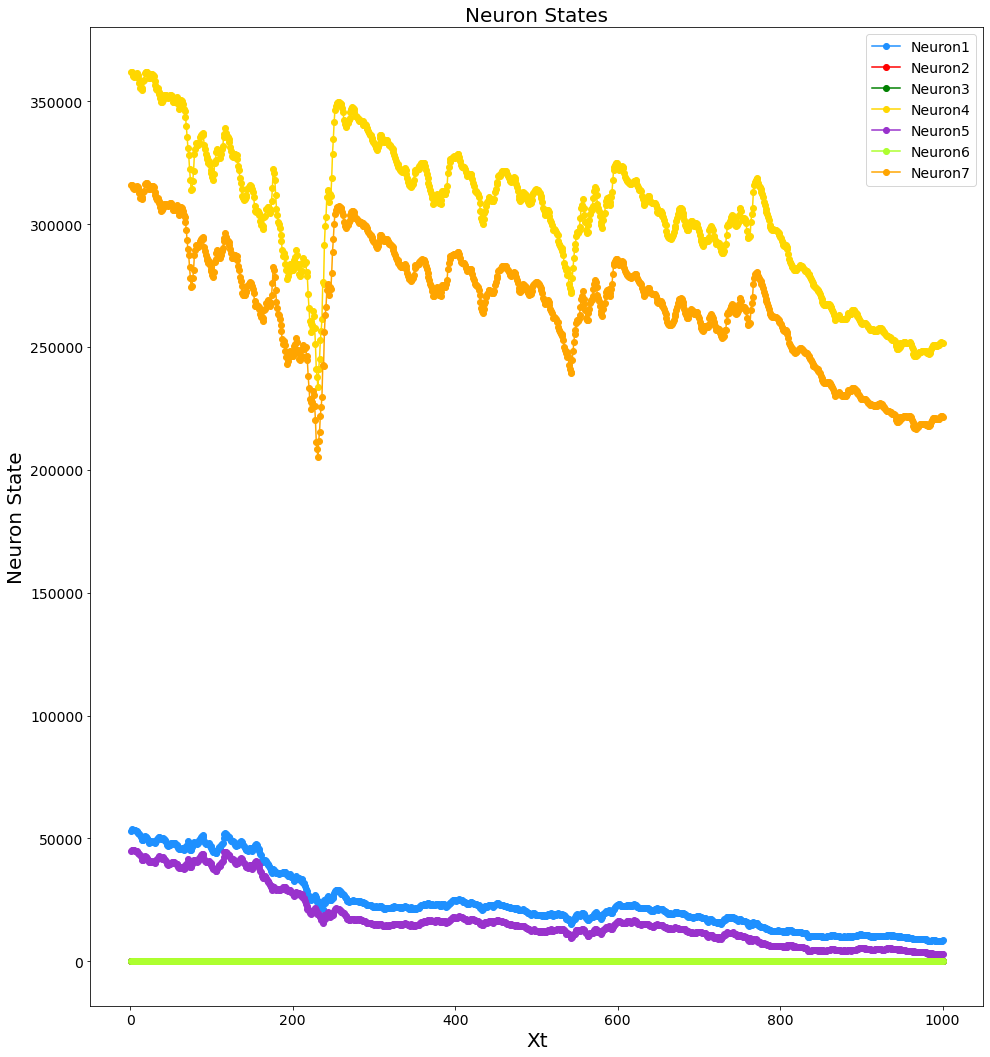

In [203]:
# Plot of all Neuron States
my_colors = ['dodgerblue', 'red', 'green', 'gold', 'darkorchid', 'greenyellow', 'orange', 'cyan', 'fuchsia', 'deeppink', 'blue', 'orchid', 'teal', 'palegreen', 'salmon', 'sienna', 'cadetblue', 'forestgreen', 'crimson', 'indigo', 'sandybrown', 'olivedrab']*5
my_neurons = []
goober = 2 # enter the neuron number you want to plot
plt.rcParams.update({'font.size': 14})
fig = plt.figure()
plt.figure(figsize=(16,18))
#for i in range((goober-1), goober): # unhash this line to do individual neuron plots
for i in range(my_h): # unhash this line to do all neuron plots
  plt.plot(range(1,(len(neuron_states[:,1])+1)), neuron_states[:,i], marker='o', color=my_colors[i])
  my_neurons.append('Neuron'+str(i+1))
plt.xlabel('Xt', fontsize = 20)
plt.ylabel('Neuron State', fontsize = 20)
plt.title('Neuron States', fontsize = 20)
plt.legend(my_neurons)
plt.show
plt.tight_layout

# Printing out each neuron's average state
print("Neuron Average States:")
aa = []
neuron_names = []
for i in range(my_h):
  print("   Neuron "+str(i+1)+": " + str(int(sum(neuron_states[:,i])/len(neuron_states[:,i])))) #calculating average for each neuron
  aa.append(int(sum(neuron_states[:,i])/len(neuron_states[:,i])))
  neuron_names.append("Neuron "+str(i+1))

print("")
#Creating a dataframe of average neuron states
AVG_neuron_states = pd.DataFrame([aa], columns = neuron_names)

   Neuron 4  Neuron 7  Neuron 1  Neuron 5  Neuron 2  Neuron 3  Neuron 6
0    304132    267258     23895     17380         0         0         0



<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

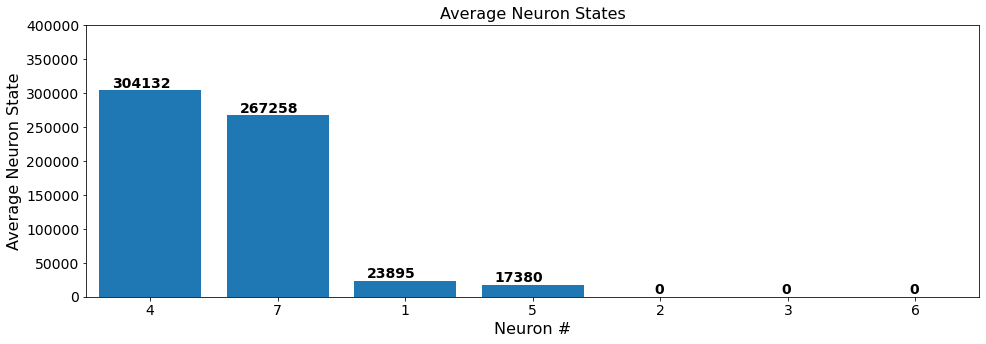

In [204]:
# Sorts and plots the average neuron states
sorted_AVG_neuron_states = AVG_neuron_states.sort_values(0,axis=1, ascending=False)
print(sorted_AVG_neuron_states)
print("")
N_list = []
N = 0
for i in range(AVG_neuron_states.shape[1]):
  N = sorted_AVG_neuron_states.columns[i][7:]
  N_list.append(N)

# Plots the weights
fig = plt.figure()
plt.figure(figsize=(16,5))
ax2 = plt.subplot2grid((10, 10), (0, 0), rowspan=10, colspan=10)
#ax2.bar(sorted_AVG_neuron_states.columns , sorted_AVG_neuron_states.loc[0,])
ax2.bar(N_list , sorted_AVG_neuron_states.loc[0,])

for i, v in enumerate(sorted_AVG_neuron_states.loc[0,]):
  if v > 0:
    ee = 4000
    ff = -.3
  else:
    ee = 4000
    ff = -.05
  ax2.text((i+ff), (v+ee), str(round(v,2)), color='black', fontweight='bold', fontsize = 14)
plt.title("Average Neuron States", fontsize=16)
plt.ylabel('Average Neuron State', fontsize=16)
plt.xlabel('Neuron #', fontsize=16)
ax2.set_xlim(-0.5, (my_h - 0.5)) 
ax2.set_ylim(0, 400000)  # May need to manually adjust y_max
ax2.xaxis.set_major_locator(MultipleLocator(1)) 
plt.show

The most active neuron is Neuron 4

The weights associated with the most active neuron are: 
         W1        W2        W3       W4        W5        W6        W7  \
0  5.676527  1.336262 -0.130077  0.43729  1.299352  0.056698  0.726437   

         W8        W9       W10       W11       W12       W13       W14  \
0  0.420435 -4.648145 -6.504951 -6.333452 -5.969729  3.758744  2.899443   

        W15       W16  
0  2.502117  2.597556  



<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

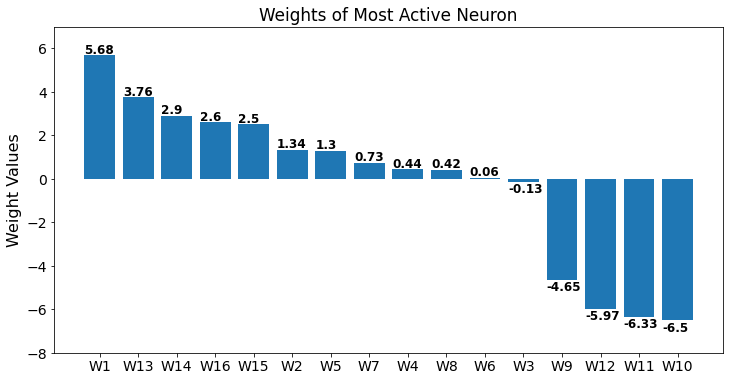

In [205]:
# Identifies the most active neuron
print("The most active neuron is " + sorted_AVG_neuron_states.columns[0])
print("")

# Gets the weights associated with the most active neuron
cc = np.asarray(AVG_neuron_states)
bb = (np.where(cc[0] == max(cc[0]))[0])[0]
active_weights = bestModel.layers[0].get_weights()[0][:,(bb)]
weight_names = ['W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10', 'W11', 'W12', 'W13', 'W14', 'W15', 'W16']
active_weights_df = pd.DataFrame([active_weights], columns=weight_names)
print("The weights associated with the most active neuron are: ")
print(active_weights_df)
sorted_active_weights_df = active_weights_df.sort_values(0,axis=1, ascending=False)
print("")


# Plots the weights
fig = plt.figure()
plt.figure(figsize=(12,6))
ax1 = plt.subplot2grid((10, 10), (0, 0), rowspan=10, colspan=10)
ax1.bar(sorted_active_weights_df.columns , sorted_active_weights_df.loc[0,])
for i, v in enumerate(sorted_active_weights_df.loc[0,]):
  if v > 0:
    ee = .1
  else:
    ee = -.5
  ax1.text((i-.4), (v+ee), str(round(v,2)), color='black', fontweight='bold', fontsize = 12)
plt.title("Weights of Most Active Neuron")
plt.ylabel('Weight Values', fontsize = 16)
ax1.set_ylim(int(min(sorted_active_weights_df.loc[0,])-2), int(max(sorted_active_weights_df.loc[0,])+2)) 
plt.show

In [206]:
bestModel.layers[0].get_weights()[0][:,6]

array([ 5.4386683 ,  0.87617135, -0.28089437,  0.04984292,  2.0007122 ,
        0.5591764 ,  1.19409   ,  0.901633  , -4.6843605 , -6.209659  ,
       -5.9585724 , -5.5365005 ,  3.215395  ,  2.576319  ,  2.2783108 ,
        2.2950907 ], dtype=float32)

The least active neuron is Neuron 6

The weights associated with the least active neuron are: 
         W1        W2        W3        W4        W5        W6        W7  \
0  6.057895  1.773296  0.370286  1.057457 -0.266108 -1.414293 -0.869707   

         W8        W9       W10       W11       W12       W13       W14  \
0 -0.755548  4.104335  2.044871  1.816896  2.503748 -3.068652 -2.008671   

        W15       W16  
0 -2.847575 -3.182934  



<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

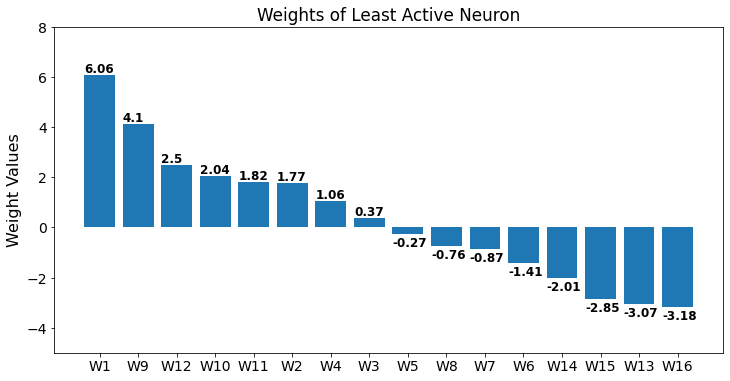

In [207]:
# Identifies the least active neuron
print("The least active neuron is " + sorted_AVG_neuron_states.columns[-1])
print("")

# Gets the weights associated with the least active neuron
cc = np.asarray(AVG_neuron_states)
bb = (np.where(cc[0] == min(cc[0]))[0])[-1]
non_active_weights = bestModel.layers[0].get_weights()[0][:,(bb)]
weight_names = ['W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10', 'W11', 'W12', 'W13', 'W14', 'W15', 'W16']
non_active_weights_df = pd.DataFrame([non_active_weights], columns=weight_names)
print("The weights associated with the least active neuron are: ")
print(non_active_weights_df)
sorted_non_active_weights_df = non_active_weights_df.sort_values(0,axis=1, ascending=False)
print("")


# Plots the weights
fig = plt.figure()
plt.figure(figsize=(12,6))
ax1 = plt.subplot2grid((10, 10), (0, 0), rowspan=10, colspan=10)
ax1.bar(sorted_non_active_weights_df.columns , sorted_non_active_weights_df.loc[0,])
for i, v in enumerate(sorted_non_active_weights_df.loc[0,]):
  if v > 0:
    ee = .1
  else:
    ee = -.5
  ax1.text((i-.4), (v+ee), str(round(v,2)), color='black', fontweight='bold', fontsize = 12)
plt.title("Weights of Least Active Neuron")
plt.ylabel('Weight Values', fontsize = 16)
ax1.set_ylim(int(min(sorted_non_active_weights_df.loc[0,])-2), int(max(sorted_non_active_weights_df.loc[0,])+2))
plt.show

# MASTER PLOTS CODE

Just trying to run all 4 h NN at one time:

In [208]:
# Establishing some variables
p = Xtrain.shape[0] # number of cases
n_feats = Xtrain.shape[1] # number of features
out = 1 # size final output layer 

# Establishing learning parameters
my_epochs = 250    # 25 is good for h=6.  
batch = 25

# Establishing other things
# loss_fn = losses.MeanSquaredError() # defines the loss function to use

# Establishing the optimizer method...?
# optimizer = optimizers.Adam(learning_rate=0.01) # Weiqiang's code
#optimizer=optimizers.SGD(learning_rate=lr_schedule) # Azencott's code

In [209]:
import time

In [217]:
#h_list=[2,6,20,64]
loss_fn = losses.MeanSquaredError()
optimizer = optimizers.Adam(learning_rate=0.01)

my_hlist_metrics = {}
model_times = []
for my_h in h_list:
    # Creating the MLP model
    model = Sequential()
    # Adding input layer
    model.add(keras.layers.Input(n_feats, name='L1'))  
    # Adding the hidden layer
    model.add(Dense(my_h, activation='relu', kernel_initializer='RandomNormal', bias_initializer='RandomNormal', input_shape=(n_feats,), name='Hidden'))
    # Adding the output layer
    model.add(Dense(1, activation='relu', kernel_initializer='RandomNormal', bias_initializer='RandomNormal', name='L2'))

    # Set the randomizer
    random.seed(a=0)

    # Compiling the model
    model.compile(optimizer=optimizer, loss=loss_fn)  # Weiqiang's code

    train_dataset = tf.data.Dataset.from_tensor_slices((Xtrain, Ytrain))
    train_dataset.element_spec

    train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch)
    train_dataset.element_spec

    batch_loss = []
    gradsNorm = [] # I think this is Test Grad(MSE)
    epoch_loss = []
    val_loss = [] # aka Test MSE
    best_val_loss = model.evaluate(Xtest,Ytest,verbose=0)

    # Creating a placeholder for the best model
    model.save(f'bestModel_h{my_h}')

    # Doing the automatic learning

    for epoch in range(my_epochs):
      print("\nStart of epoch %d" % (epoch,))
      for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
          y_batch_pred = model(x_batch_train, training=True)
          loss_value = loss_fn(y_batch_train,y_batch_pred)
        grads = tape.gradient(loss_value, model.trainable_weights)
        gradsNorm.append(   np.sqrt( sum( [ np.sum( np.square(g.numpy()))  for g in grads ])))
        batch_loss.append(loss_value.numpy())
        optimizer.apply_gradients( zip( grads,model.trainable_weights))
      epoch_loss_value = model.evaluate(Xtrain,Ytrain,verbose=0)
      epoch_loss.append(epoch_loss_value)

      val_loss_value = model.evaluate(Xtest,Ytest,verbose=0)
      val_loss.append(val_loss_value)
      print("epoch_loss: %.4f - val_loss:%.4f" %  (float(epoch_loss_value), float(val_loss_value)))

#       if val_loss_value < best_val_loss:
#          best_val_loss=val_loss_value
#          model.save(f'bestModel_h{my_h}')
  
      my_hlist_metrics[f'batch_loss_h{my_h}'] = batch_loss
      my_hlist_metrics[f'gradsNorm_h{my_h}'] = gradsNorm
      my_hlist_metrics[f'epoch_loss_h{my_h}'] = epoch_loss
      my_hlist_metrics[f'val_loss_h{my_h}'] = val_loss
      my_hlist_metrics[f'best_val_loss_h{my_h}'] = best_val_loss

      model_h_time = (time.process_time() - start)
      print(f"Time to run model_h{my_h}: {model_h_time//60} minutes {model_h_time%60} seconds")
      model_times.append(model_h_time)

INFO:tensorflow:Assets written to: bestModel_h3\assets

Start of epoch 0
epoch_loss: 4055332.7500 - val_loss:3526109.7500
Time to run model_h3: 22.0 minutes 23.578125 seconds

Start of epoch 1
epoch_loss: 4030647.2500 - val_loss:3500629.7500
Time to run model_h3: 22.0 minutes 23.796875 seconds

Start of epoch 2
epoch_loss: 3985056.2500 - val_loss:3453561.0000
Time to run model_h3: 22.0 minutes 24.0625 seconds

Start of epoch 3
epoch_loss: 3918983.2500 - val_loss:3385518.7500
Time to run model_h3: 22.0 minutes 24.328125 seconds

Start of epoch 4
epoch_loss: 3840288.7500 - val_loss:3304885.5000
Time to run model_h3: 22.0 minutes 24.546875 seconds

Start of epoch 5
epoch_loss: 3752706.2500 - val_loss:3215810.2500
Time to run model_h3: 22.0 minutes 24.78125 seconds

Start of epoch 6
epoch_loss: 3664910.7500 - val_loss:3127460.5000
Time to run model_h3: 22.0 minutes 25.046875 seconds

Start of epoch 7
epoch_loss: 3579958.7500 - val_loss:3043184.7500
Time to run model_h3: 22.0 minutes 25.312

epoch_loss: 2294417.5000 - val_loss:1547429.2500
Time to run model_h3: 22.0 minutes 42.078125 seconds

Start of epoch 69
epoch_loss: 2293180.5000 - val_loss:1546223.6250
Time to run model_h3: 22.0 minutes 42.3125 seconds

Start of epoch 70
epoch_loss: 2291923.0000 - val_loss:1544456.3750
Time to run model_h3: 22.0 minutes 42.53125 seconds

Start of epoch 71
epoch_loss: 2290658.7500 - val_loss:1542698.1250
Time to run model_h3: 22.0 minutes 42.75 seconds

Start of epoch 72
epoch_loss: 2289431.2500 - val_loss:1541741.8750
Time to run model_h3: 22.0 minutes 43.046875 seconds

Start of epoch 73
epoch_loss: 2288133.7500 - val_loss:1539283.0000
Time to run model_h3: 22.0 minutes 43.28125 seconds

Start of epoch 74
epoch_loss: 2286840.7500 - val_loss:1537856.1250
Time to run model_h3: 22.0 minutes 43.53125 seconds

Start of epoch 75
epoch_loss: 2285598.0000 - val_loss:1536662.1250
Time to run model_h3: 22.0 minutes 43.765625 seconds

Start of epoch 76
epoch_loss: 2284303.0000 - val_loss:15350

epoch_loss: 29343.7207 - val_loss:17362.9902
Time to run model_h3: 23.0 minutes 0.171875 seconds

Start of epoch 138
epoch_loss: 26334.3730 - val_loss:15582.7412
Time to run model_h3: 23.0 minutes 0.6875 seconds

Start of epoch 139
epoch_loss: 23582.8418 - val_loss:13967.8555
Time to run model_h3: 23.0 minutes 1.046875 seconds

Start of epoch 140
epoch_loss: 21317.2070 - val_loss:12824.5908
Time to run model_h3: 23.0 minutes 1.34375 seconds

Start of epoch 141
epoch_loss: 19389.7852 - val_loss:11852.5264
Time to run model_h3: 23.0 minutes 1.609375 seconds

Start of epoch 142
epoch_loss: 17694.7383 - val_loss:10953.9600
Time to run model_h3: 23.0 minutes 1.84375 seconds

Start of epoch 143
epoch_loss: 16054.7129 - val_loss:10118.9551
Time to run model_h3: 23.0 minutes 2.0625 seconds

Start of epoch 144
epoch_loss: 14477.4521 - val_loss:9376.5283
Time to run model_h3: 23.0 minutes 2.34375 seconds

Start of epoch 145
epoch_loss: 13148.9150 - val_loss:8797.4502
Time to run model_h3: 23.0 m

epoch_loss: 2345.7546 - val_loss:1547.6748
Time to run model_h3: 23.0 minutes 19.875 seconds

Start of epoch 210
epoch_loss: 2285.8228 - val_loss:1482.1859
Time to run model_h3: 23.0 minutes 20.125 seconds

Start of epoch 211
epoch_loss: 2280.5774 - val_loss:1488.9537
Time to run model_h3: 23.0 minutes 20.34375 seconds

Start of epoch 212
epoch_loss: 2306.0898 - val_loss:1530.2848
Time to run model_h3: 23.0 minutes 20.578125 seconds

Start of epoch 213
epoch_loss: 2294.1514 - val_loss:1496.5139
Time to run model_h3: 23.0 minutes 20.84375 seconds

Start of epoch 214
epoch_loss: 2298.9248 - val_loss:1530.3359
Time to run model_h3: 23.0 minutes 21.109375 seconds

Start of epoch 215
epoch_loss: 2263.5225 - val_loss:1484.5325
Time to run model_h3: 23.0 minutes 21.34375 seconds

Start of epoch 216
epoch_loss: 2261.9346 - val_loss:1480.6389
Time to run model_h3: 23.0 minutes 21.59375 seconds

Start of epoch 217
epoch_loss: 2290.6030 - val_loss:1527.3400
Time to run model_h3: 23.0 minutes 21.8

epoch_loss: 257716.3125 - val_loss:217120.5625
Time to run model_h7: 23.0 minutes 38.984375 seconds

Start of epoch 31
epoch_loss: 254459.8594 - val_loss:213571.2812
Time to run model_h7: 23.0 minutes 39.25 seconds

Start of epoch 32
epoch_loss: 251082.8594 - val_loss:211139.8438
Time to run model_h7: 23.0 minutes 39.546875 seconds

Start of epoch 33
epoch_loss: 247981.3750 - val_loss:208383.2344
Time to run model_h7: 23.0 minutes 39.796875 seconds

Start of epoch 34
epoch_loss: 244478.2344 - val_loss:205287.8438
Time to run model_h7: 23.0 minutes 40.046875 seconds

Start of epoch 35
epoch_loss: 240553.7031 - val_loss:201453.9531
Time to run model_h7: 23.0 minutes 40.375 seconds

Start of epoch 36
epoch_loss: 236848.4219 - val_loss:198689.4375
Time to run model_h7: 23.0 minutes 40.859375 seconds

Start of epoch 37
epoch_loss: 232957.1562 - val_loss:195784.9531
Time to run model_h7: 23.0 minutes 41.1875 seconds

Start of epoch 38
epoch_loss: 229224.2656 - val_loss:193074.7031
Time to ru

epoch_loss: 9792.9922 - val_loss:9623.2402
Time to run model_h7: 23.0 minutes 57.421875 seconds

Start of epoch 102
epoch_loss: 9638.4941 - val_loss:9677.5947
Time to run model_h7: 23.0 minutes 57.640625 seconds

Start of epoch 103
epoch_loss: 9234.1191 - val_loss:9146.2695
Time to run model_h7: 23.0 minutes 57.890625 seconds

Start of epoch 104
epoch_loss: 8945.3672 - val_loss:8810.7188
Time to run model_h7: 23.0 minutes 58.109375 seconds

Start of epoch 105
epoch_loss: 8725.7754 - val_loss:8656.7275
Time to run model_h7: 23.0 minutes 58.328125 seconds

Start of epoch 106
epoch_loss: 8573.5127 - val_loss:8188.7188
Time to run model_h7: 23.0 minutes 58.5625 seconds

Start of epoch 107
epoch_loss: 8361.8115 - val_loss:7966.1045
Time to run model_h7: 23.0 minutes 58.796875 seconds

Start of epoch 108
epoch_loss: 8104.4888 - val_loss:7752.2031
Time to run model_h7: 23.0 minutes 59.03125 seconds

Start of epoch 109
epoch_loss: 7810.6675 - val_loss:7669.8013
Time to run model_h7: 23.0 minut

epoch_loss: 2806.6123 - val_loss:2309.8835
Time to run model_h7: 24.0 minutes 16.125 seconds

Start of epoch 174
epoch_loss: 2792.9556 - val_loss:2304.2117
Time to run model_h7: 24.0 minutes 16.375 seconds

Start of epoch 175
epoch_loss: 2779.7781 - val_loss:2300.6777
Time to run model_h7: 24.0 minutes 16.640625 seconds

Start of epoch 176
epoch_loss: 2731.3872 - val_loss:2210.9780
Time to run model_h7: 24.0 minutes 16.890625 seconds

Start of epoch 177
epoch_loss: 2706.7441 - val_loss:2213.0449
Time to run model_h7: 24.0 minutes 17.125 seconds

Start of epoch 178
epoch_loss: 2667.3005 - val_loss:2173.9846
Time to run model_h7: 24.0 minutes 17.34375 seconds

Start of epoch 179
epoch_loss: 2716.2693 - val_loss:2225.5107
Time to run model_h7: 24.0 minutes 17.578125 seconds

Start of epoch 180
epoch_loss: 2619.3843 - val_loss:2093.8630
Time to run model_h7: 24.0 minutes 17.828125 seconds

Start of epoch 181
epoch_loss: 2599.1714 - val_loss:2077.4277
Time to run model_h7: 24.0 minutes 18.0

epoch_loss: 2080.6238 - val_loss:1429.3253
Time to run model_h7: 24.0 minutes 33.46875 seconds

Start of epoch 246
epoch_loss: 1862.3311 - val_loss:1250.3438
Time to run model_h7: 24.0 minutes 33.703125 seconds

Start of epoch 247
epoch_loss: 1976.0531 - val_loss:1307.8125
Time to run model_h7: 24.0 minutes 33.9375 seconds

Start of epoch 248
epoch_loss: 1856.8356 - val_loss:1239.3134
Time to run model_h7: 24.0 minutes 34.1875 seconds

Start of epoch 249
epoch_loss: 1859.3934 - val_loss:1218.0653
Time to run model_h7: 24.0 minutes 34.40625 seconds
INFO:tensorflow:Assets written to: bestModel_h18\assets

Start of epoch 0
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 24.0 minutes 35.34375 seconds

Start of epoch 1
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 24.0 minutes 35.5625 seconds

Start of epoch 2
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 24.0 minutes 35.8125 seconds

Start of epoch 3
epoch_loss: 40

epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 24.0 minutes 52.28125 seconds

Start of epoch 64
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 24.0 minutes 52.53125 seconds

Start of epoch 65
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 24.0 minutes 52.75 seconds

Start of epoch 66
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 24.0 minutes 52.984375 seconds

Start of epoch 67
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 24.0 minutes 53.21875 seconds

Start of epoch 68
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 24.0 minutes 53.4375 seconds

Start of epoch 69
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 24.0 minutes 53.65625 seconds

Start of epoch 70
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 24.0 minutes 53.890625 seconds

Start of epoch 71
epoch_loss: 4063144.0000 - val_los

epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 25.0 minutes 8.765625 seconds

Start of epoch 132
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 25.0 minutes 9.0 seconds

Start of epoch 133
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 25.0 minutes 9.234375 seconds

Start of epoch 134
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 25.0 minutes 9.46875 seconds

Start of epoch 135
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 25.0 minutes 9.71875 seconds

Start of epoch 136
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 25.0 minutes 9.953125 seconds

Start of epoch 137
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 25.0 minutes 10.171875 seconds

Start of epoch 138
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 25.0 minutes 10.421875 seconds

Start of epoch 139
epoch_loss: 4063144.0000 - va

epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 25.0 minutes 25.796875 seconds

Start of epoch 200
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 25.0 minutes 26.03125 seconds

Start of epoch 201
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 25.0 minutes 26.28125 seconds

Start of epoch 202
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 25.0 minutes 26.515625 seconds

Start of epoch 203
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 25.0 minutes 26.75 seconds

Start of epoch 204
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 25.0 minutes 26.984375 seconds

Start of epoch 205
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 25.0 minutes 27.21875 seconds

Start of epoch 206
epoch_loss: 4063144.0000 - val_loss:3534080.2500
Time to run model_h18: 25.0 minutes 27.5 seconds

Start of epoch 207
epoch_loss: 4063144.0000 - v

epoch_loss: 45905.4609 - val_loss:48877.2266
Time to run model_h44: 25.0 minutes 43.8125 seconds

Start of epoch 18
epoch_loss: 38492.6562 - val_loss:42440.1406
Time to run model_h44: 25.0 minutes 44.0625 seconds

Start of epoch 19
epoch_loss: 32576.0820 - val_loss:35661.5742
Time to run model_h44: 25.0 minutes 44.359375 seconds

Start of epoch 20
epoch_loss: 27275.3398 - val_loss:29406.6016
Time to run model_h44: 25.0 minutes 44.734375 seconds

Start of epoch 21
epoch_loss: 21980.7695 - val_loss:23749.1426
Time to run model_h44: 25.0 minutes 44.984375 seconds

Start of epoch 22
epoch_loss: 17633.5742 - val_loss:19058.8340
Time to run model_h44: 25.0 minutes 45.25 seconds

Start of epoch 23
epoch_loss: 14474.2803 - val_loss:15887.2646
Time to run model_h44: 25.0 minutes 45.6875 seconds

Start of epoch 24
epoch_loss: 12102.5840 - val_loss:12897.7178
Time to run model_h44: 25.0 minutes 46.0 seconds

Start of epoch 25
epoch_loss: 10243.9688 - val_loss:10269.7236
Time to run model_h44: 25.

epoch_loss: 1924.4309 - val_loss:1339.3677
Time to run model_h44: 26.0 minutes 4.4375 seconds

Start of epoch 90
epoch_loss: 2174.8601 - val_loss:1542.1332
Time to run model_h44: 26.0 minutes 4.703125 seconds

Start of epoch 91
epoch_loss: 1983.4734 - val_loss:1369.6422
Time to run model_h44: 26.0 minutes 5.078125 seconds

Start of epoch 92
epoch_loss: 1906.7007 - val_loss:1310.7216
Time to run model_h44: 26.0 minutes 5.46875 seconds

Start of epoch 93
epoch_loss: 2005.2853 - val_loss:1406.9122
Time to run model_h44: 26.0 minutes 5.765625 seconds

Start of epoch 94
epoch_loss: 1893.1614 - val_loss:1281.9385
Time to run model_h44: 26.0 minutes 6.09375 seconds

Start of epoch 95
epoch_loss: 2086.7844 - val_loss:1474.9463
Time to run model_h44: 26.0 minutes 6.34375 seconds

Start of epoch 96
epoch_loss: 2157.0020 - val_loss:1534.1893
Time to run model_h44: 26.0 minutes 6.71875 seconds

Start of epoch 97
epoch_loss: 2312.3875 - val_loss:1584.4478
Time to run model_h44: 26.0 minutes 7.01562

epoch_loss: 1765.4077 - val_loss:1276.6128
Time to run model_h44: 26.0 minutes 25.359375 seconds

Start of epoch 162
epoch_loss: 2189.9656 - val_loss:1574.6321
Time to run model_h44: 26.0 minutes 25.625 seconds

Start of epoch 163
epoch_loss: 2019.2920 - val_loss:1537.0902
Time to run model_h44: 26.0 minutes 25.84375 seconds

Start of epoch 164
epoch_loss: 1768.8226 - val_loss:1221.3378
Time to run model_h44: 26.0 minutes 26.078125 seconds

Start of epoch 165
epoch_loss: 1729.0902 - val_loss:1269.3473
Time to run model_h44: 26.0 minutes 26.390625 seconds

Start of epoch 166
epoch_loss: 1735.4147 - val_loss:1218.0762
Time to run model_h44: 26.0 minutes 26.703125 seconds

Start of epoch 167
epoch_loss: 1705.3762 - val_loss:1209.4634
Time to run model_h44: 26.0 minutes 26.96875 seconds

Start of epoch 168
epoch_loss: 1807.8199 - val_loss:1366.5118
Time to run model_h44: 26.0 minutes 27.21875 seconds

Start of epoch 169
epoch_loss: 1800.0730 - val_loss:1357.5084
Time to run model_h44: 26.0

epoch_loss: 1730.5668 - val_loss:1347.1117
Time to run model_h44: 26.0 minutes 43.546875 seconds

Start of epoch 233
epoch_loss: 1711.7640 - val_loss:1326.0309
Time to run model_h44: 26.0 minutes 43.796875 seconds

Start of epoch 234
epoch_loss: 1642.5457 - val_loss:1209.6796
Time to run model_h44: 26.0 minutes 44.046875 seconds

Start of epoch 235
epoch_loss: 1748.3766 - val_loss:1326.2345
Time to run model_h44: 26.0 minutes 44.28125 seconds

Start of epoch 236
epoch_loss: 1676.8958 - val_loss:1239.6385
Time to run model_h44: 26.0 minutes 44.53125 seconds

Start of epoch 237
epoch_loss: 2232.0916 - val_loss:1618.3889
Time to run model_h44: 26.0 minutes 44.796875 seconds

Start of epoch 238
epoch_loss: 1642.9215 - val_loss:1276.4840
Time to run model_h44: 26.0 minutes 45.03125 seconds

Start of epoch 239
epoch_loss: 1634.2032 - val_loss:1246.2072
Time to run model_h44: 26.0 minutes 45.25 seconds

Start of epoch 240
epoch_loss: 1729.1338 - val_loss:1259.2954
Time to run model_h44: 26.0 

In [218]:
for i,j in zip(model_times,h_list):
  print(f"model_H{j} run time 250 epochs--> {i//60} minutes {i%60} seconds")

model_H3 run time 250 epochs--> 22.0 minutes 23.578125 seconds
model_H7 run time 250 epochs--> 22.0 minutes 23.796875 seconds
model_H18 run time 250 epochs--> 22.0 minutes 24.0625 seconds
model_H44 run time 250 epochs--> 22.0 minutes 24.328125 seconds


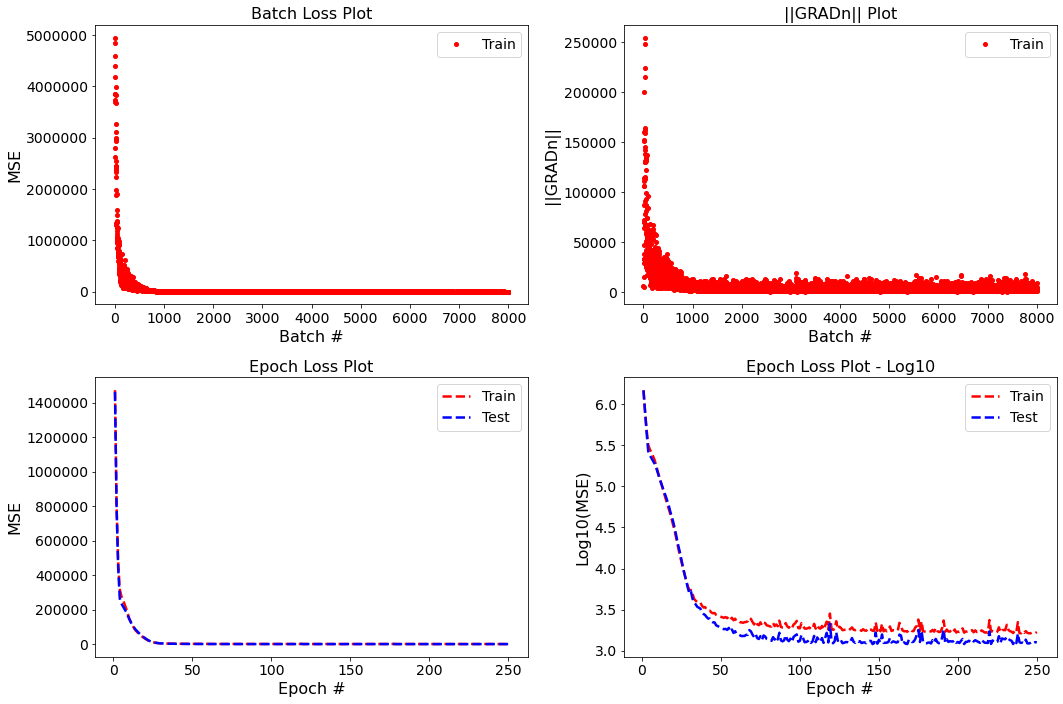

In [219]:
intrested_h = 44

fig = plt.figure(figsize= (15,10))
ax1 = fig.add_subplot(2,2,1)
# Traing MSE batch to batch
plt.plot(range(1,(len(my_hlist_metrics[f'batch_loss_h{intrested_h}'])+1)), my_hlist_metrics[f'batch_loss_h{intrested_h}'], 'ro', markersize=4)
plt.ticklabel_format(style = 'plain')
plt.xlabel('Batch #', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.title('Batch Loss Plot', fontsize=16)
plt.legend(['Train'])


ax2 = fig.add_subplot(2,2,2)
# Normalized Graident of (Train MSE) aka norGrad^n
plt.plot(range(1,(len(my_hlist_metrics[f'gradsNorm_h{intrested_h}'])+1)), my_hlist_metrics[f'gradsNorm_h{intrested_h}'], 'ro', markersize=4)
plt.xlabel('Batch #', fontsize=16)
plt.ylabel('||GRADn||', fontsize=16)
plt.title('||GRADn|| Plot', fontsize=16)
plt.legend(['Train'])

ax3 = fig.add_subplot(2,2,3)
# Train MSE plot
plt.plot(range(1,(len(my_hlist_metrics[f'epoch_loss_h{intrested_h}'])+1)), my_hlist_metrics[f'epoch_loss_h{intrested_h}'],
         color='red', linestyle='dashed', linewidth=2.5, markersize=3)
plt.plot(range(1,(len(my_hlist_metrics[f'val_loss_h{intrested_h}'])+1)), my_hlist_metrics[f'val_loss_h{intrested_h}'],
         color='blue', linestyle='dashed', linewidth=2.5, markersize=3)
plt.ticklabel_format(style = 'plain')
plt.xlabel('Epoch #', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.legend(['Train', 'Test'])
plt.title('Epoch Loss Plot', fontsize=16)

ax4 = fig.add_subplot(2,2,4)
# Train MSE plot (log)
plt.plot(range(1,(len(my_hlist_metrics[f'epoch_loss_h{intrested_h}'])+1)), np.log10(my_hlist_metrics[f'epoch_loss_h{intrested_h}']),
         color='red', linestyle='dashed', linewidth=2.5, markersize=3)
plt.plot(range(1,(len(my_hlist_metrics[f'val_loss_h{intrested_h}'])+1)), np.log10(my_hlist_metrics[f'val_loss_h{intrested_h}']),
         color='blue', linestyle='dashed', linewidth=2.5, markersize=3)
plt.xlabel('Epoch #', fontsize=16)
plt.ylabel('Log10(MSE)', fontsize=16)
plt.title('Epoch Loss Plot - Log10', fontsize=16)
plt.legend(['Train', 'Test'])

# fig.suptitle(f'Metrics for h = {intrested_h}', fontsize = 24);
plt.tight_layout()


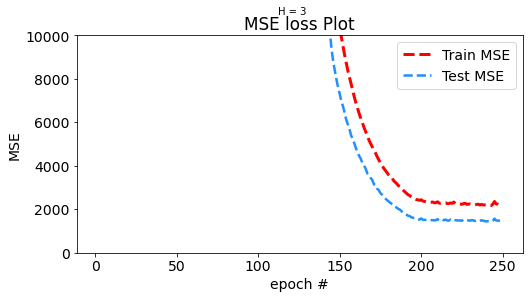

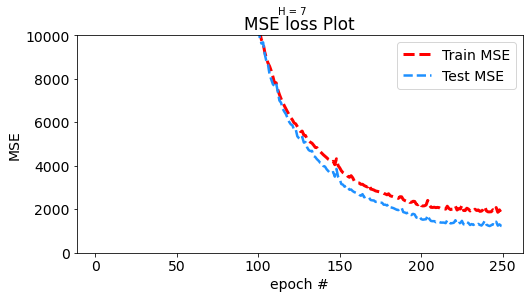

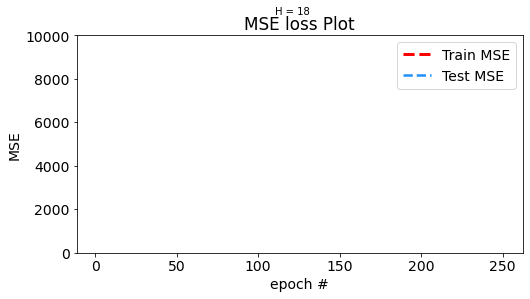

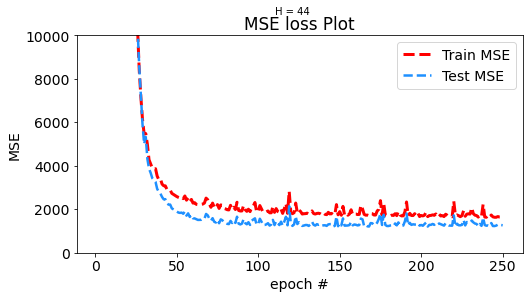

In [220]:

for i in h_list:
  intrested_h = i

  fig = plt.figure(figsize= (8,4))

  # ax1 = fig.add_subplot(1,2,1)
  # # Test MSE plot
  # plt.plot(range(1,(len(my_hlist_metrics[f'val_loss_h{intrested_h}'])+1)), my_hlist_metrics[f'val_loss_h{intrested_h}'],
  #         color='dodgerblue', marker='o', linestyle='dashed', linewidth=1, markersize=6)
  # plt.xlabel('epoch #')
  # plt.ylabel('MSE')
  # plt.title('val loss Plot')
  # plt.ticklabel_format(style = 'plain')
  # plt.show

  ax2 = fig.add_subplot(1,1,1)
  # Train & Test MSE plot
  # fig = plt.figure(figsize= (20,4))
  plt.plot(range(1,(len(my_hlist_metrics[f'epoch_loss_h{intrested_h}'])+1)), my_hlist_metrics[f'epoch_loss_h{intrested_h}'],
          color='red', linestyle='dashed', linewidth=3, markersize=4) # Train MSE
  plt.plot(range(1,(len(my_hlist_metrics[f'val_loss_h{intrested_h}'])+1)), my_hlist_metrics[f'val_loss_h{intrested_h}'],
          color='dodgerblue', linestyle='dashed', linewidth=2.5, markersize=4) # Test MSE
  plt.xlabel('epoch #')
  plt.ylabel('MSE')
  plt.title('MSE loss Plot')
  plt.legend(['Train MSE', 'Test MSE'])
  plt.ticklabel_format(style = 'plain')
  plt.ylim(0,10000) #10000
  # plt.yticks(np.arange(0,11000,1500))
  # plt.xlim(0,300)
  plt.show

  fig.suptitle(f'H = {intrested_h}', fontsize = 10);

In [221]:
bModel_h3 = tf.keras.models.load_model('bestModel_h3')
bModel_h3.evaluate(Xtest,Ytest)

7/7 [==============================] - 0s 3ms/step - loss: 3533931.0000


3533931.0

In [222]:
bModel_h7 = tf.keras.models.load_model('bestModel_h7')
bModel_h7.evaluate(Xtest,Ytest)

7/7 [==============================] - 0s 2ms/step - loss: 3534029.5000


3534029.5

In [223]:
bModel_h18 = tf.keras.models.load_model('bestModel_h18')
bModel_h18.evaluate(Xtest,Ytest)

7/7 [==============================] - 0s 2ms/step - loss: 3534080.2500


3534080.25

In [224]:
bModel_h44 = tf.keras.models.load_model('bestModel_h44')
bModel_h44.evaluate(Xtest,Ytest)

7/7 [==============================] - 0s 939us/step - loss: 3533703.2500


3533703.25

In [ ]:
 # Train & Test MSE plot
# fig = plt.figure(figsize= (20,4))
intrested_h = 62

plt.plot(range(1,(len(my_hlist_metrics[f'epoch_loss_h{intrested_h}'])+1)), my_hlist_metrics[f'epoch_loss_h{intrested_h}'],
        color='red', linestyle='dashed', linewidth=2, markersize=6) # Train MSE
plt.plot(range(1,(len(my_hlist_metrics[f'val_loss_h{intrested_h}'])+1)), my_hlist_metrics[f'val_loss_h{intrested_h}'],
        color='dodgerblue', linestyle='dashed', linewidth=2, markersize=6) # Test MSE
plt.xlabel('epoch #')
plt.ylabel('MSE')
plt.title('MSE loss Plot')
plt.legend(['Train MSE', 'Test MSE'])
plt.ticklabel_format(style = 'plain')
plt.ylim(0,10000)
plt.xlim(0,500)
plt.show

fig.suptitle(f'Metrics for h = {intrested_h}', fontsize = 24);

In [ ]:
# Validation set is easier to predict than training as shown by the lower test MSE.

In [ ]:
plt.hist(Y);